In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
data_set=pd.read_csv("../input/student-mental-health/Student Mental health.csv")

In [3]:
data_set.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
data_set.dtypes
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [5]:
#taking care of null values and replacing null with median
data_set.isnull().sum()   

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [6]:
data_set['Age'].fillna(data_set['Age'].mean(), inplace = True)

In [7]:
data_set.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [8]:
#fixing duplicated data
print("CGPA column values:", data_set['What is your CGPA?'].unique())
print("Year column values:", data_set['Your current year of Study'].unique())

CGPA column values: ['3.00 - 3.49' '3.50 - 4.00' '3.50 - 4.00 ' '2.50 - 2.99' '2.00 - 2.49'
 '0 - 1.99']
Year column values: ['year 1' 'year 2' 'Year 1' 'year 3' 'year 4' 'Year 2' 'Year 3']


In [9]:
data_set['What is your CGPA?']=np.where(data_set['What is your CGPA?'] =='3.50 - 4.00 ', '3.50 - 4.00', data_set['What is your CGPA?'])
print(" CGPA column values:", data_set['What is your CGPA?'].unique())


 CGPA column values: ['3.00 - 3.49' '3.50 - 4.00' '2.50 - 2.99' '2.00 - 2.49' '0 - 1.99']


In [10]:
data_set['Your current year of Study']=np.where(data_set['Your current year of Study'] =='Year 1', 'year 1', data_set['Your current year of Study'])
data_set['Your current year of Study']=np.where(data_set['Your current year of Study'] =='Year 2', 'year 2', data_set['Your current year of Study'])
data_set['Your current year of Study']=np.where(data_set['Your current year of Study'] =='Year 3', 'year 3', data_set['Your current year of Study'])

print("column values:", data_set['Your current year of Study'].unique())

column values: ['year 1' 'year 2' 'year 3' 'year 4']


In [11]:
train_data= data_set.copy()

In [12]:
#transforming data to the required needs
train_data.rename(columns = {'Choose your gender': 'gender', 
                     'Do you have Depression?': 'depression_status',
                     'Do you have Panic attack?': 'Family_history_of_mental_disorders',
                     'Do you have Anxiety?': 'Exercise',
                     'Timestamp': 'timestamp',
                     'What is your CGPA?': 'cgpa',
                     'Age': 'age',
                     'What is your course?': 'course',
                     'Your current year of Study': 'year',
                     'Marital status': 'marital_status',
                     'Did you seek any specialist for a treatment?': 'Medical_attention_required'}, inplace = True)
train_data.head()

,timestamp,gender,age,course,year,cgpa,marital_status,depression_status,Exercise,Family_history_of_mental_disorders,Medical_attention_required
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [13]:
#dropping unused columns and encoding classification data
training=pd.get_dummies(train_data, columns=["cgpa","year"])
training.Exercise.replace(('Yes', 'No'), (0, 1), inplace=True)
training.Family_history_of_mental_disorders.replace(('Yes', 'No'), (1,0), inplace=True)
training.Medical_attention_required.replace(('Yes', 'No'), (1, 0), inplace=True)
training.gender.replace(('Female', 'Male'), (1, 0), inplace=True)
training.depression_status.replace(('Yes', 'No'), (1, 0), inplace=True)
training.drop('timestamp', axis=1, inplace=True)
training.drop('course', axis=1, inplace=True)
training.drop('marital_status', axis=1, inplace=True)
training.head()

,gender,age,depression_status,Exercise,Family_history_of_mental_disorders,Medical_attention_required,cgpa_0 - 1.99,cgpa_2.00 - 2.49,cgpa_2.50 - 2.99,cgpa_3.00 - 3.49,cgpa_3.50 - 4.00,year_year 1,year_year 2,year_year 3,year_year 4
0,1,18.0,1,1,1,0,0,0,0,1,0,1,0,0,0
1,0,21.0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,19.0,1,0,1,0,0,0,0,1,0,1,0,0,0
3,1,22.0,1,1,0,0,0,0,0,1,0,0,0,1,0
4,0,23.0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [14]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   gender                              101 non-null    int64  
 1   age                                 101 non-null    float64
 2   depression_status                   101 non-null    int64  
 3   Exercise                            101 non-null    int64  
 4   Family_history_of_mental_disorders  101 non-null    int64  
 5   Medical_attention_required          101 non-null    int64  
 6   cgpa_0 - 1.99                       101 non-null    uint8  
 7   cgpa_2.00 - 2.49                    101 non-null    uint8  
 8   cgpa_2.50 - 2.99                    101 non-null    uint8  
 9   cgpa_3.00 - 3.49                    101 non-null    uint8  
 10  cgpa_3.50 - 4.00                    101 non-null    uint8  
 11  year_year 1                         101 non-n

In [15]:
#spliting data set into training and test set
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(training,test_size=0.2,random_state=42)
print(f"Row in train set={len(train_set)}\nRow in test set={len(test_set)}")
train_set.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Row in train set=80
Row in test set=21


,gender,age,depression_status,Exercise,Family_history_of_mental_disorders,Medical_attention_required,cgpa_0 - 1.99,cgpa_2.00 - 2.49,cgpa_2.50 - 2.99,cgpa_3.00 - 3.49,cgpa_3.50 - 4.00,year_year 1,year_year 2,year_year 3,year_year 4
89,0,24.0,0,1,1,0,0,1,0,0,0,0,1,0,0
26,1,19.0,0,1,0,0,0,0,0,0,1,1,0,0,0
42,1,20.0,1,1,0,0,0,0,0,1,0,0,1,0,0
70,1,24.0,0,1,0,0,0,0,0,1,0,1,0,0,0
15,0,24.0,0,1,0,0,0,0,0,0,1,0,0,1,0


Text(0, 0.5, 'Proportion of Students')

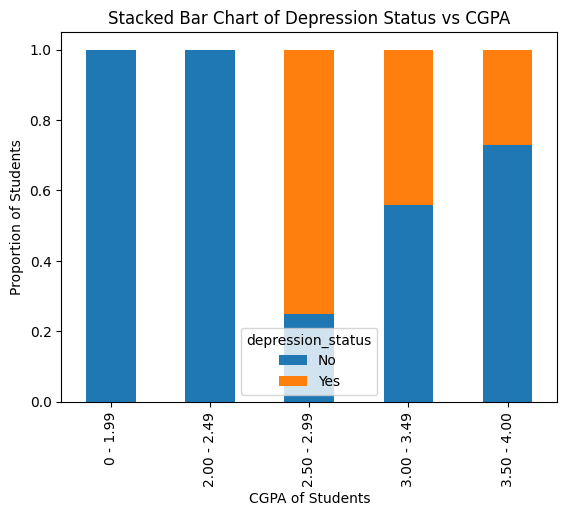

In [16]:
#analysing given data set
import matplotlib.pyplot as plt 
table=pd.crosstab(train_data['cgpa'],train_data['depression_status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Depression Status vs CGPA')
plt.xlabel('CGPA of Students')
plt.ylabel('Proportion of Students')


Text(0, 0.5, 'Proportion of Students')

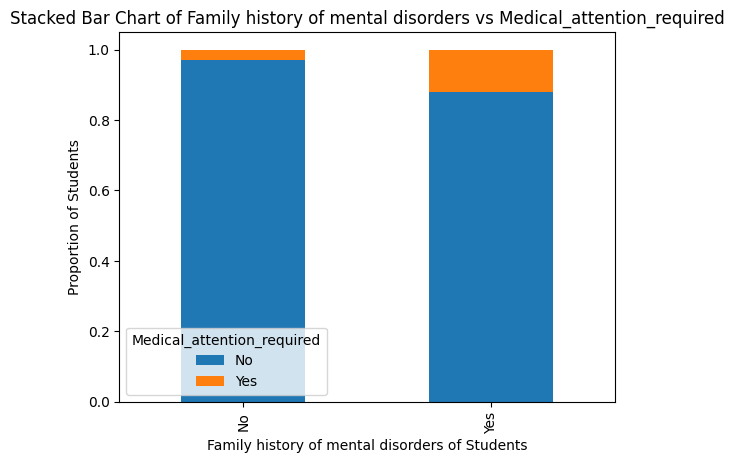

In [17]:
table=pd.crosstab(train_data['Family_history_of_mental_disorders'],train_data['Medical_attention_required'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Family history of mental disorders vs Medical_attention_required')
plt.xlabel('Family history of mental disorders of Students')
plt.ylabel('Proportion of Students')

Text(0, 0.5, 'Proportion of Students')

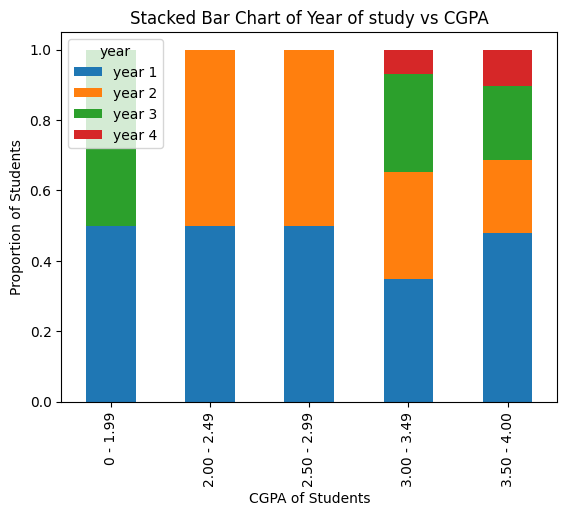

In [18]:
table=pd.crosstab(train_data['cgpa'],train_data['year'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Year of study vs CGPA')
plt.xlabel('CGPA of Students')
plt.ylabel('Proportion of Students')

Text(0, 0.5, 'Proportion of Students')

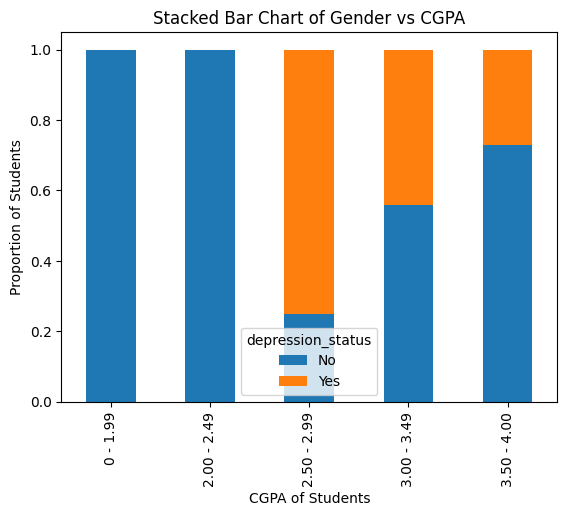

In [19]:
table=pd.crosstab(train_data['cgpa'],train_data['depression_status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs CGPA')
plt.xlabel('CGPA of Students')
plt.ylabel('Proportion of Students')

In [20]:
#creatin data sets for predications
train_setX=train_set.drop("Medical_attention_required",axis=1)
train_sety=train_set["Medical_attention_required"].copy()
test_setX=test_set.drop("Medical_attention_required",axis=1)
test_sety=test_set["Medical_attention_required"].copy()

In [21]:
#choosing the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [22]:
#training the model overtrain set
model.fit(train_setX,train_sety)

LogisticRegression()

In [23]:
#predicting accuracy over training data
from sklearn.metrics import accuracy_score
pred=model.predict(train_setX)
accuracy=accuracy_score(pred,train_sety)
print(accuracy)

0.95


In [24]:
#predicting accuracy over testing data
pred=model.predict(test_setX)
accuracy=accuracy_score(pred,test_sety)
print(accuracy)

0.9047619047619048
